In [1]:
# import basic library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [2]:
# load dataset
data = load_breast_cancer()
df_cancer = pd.DataFrame(np.c_[data.data, data.target], columns=np.append(data.feature_names, ['target']))

print('data shapes: ', df_cancer.shape)
df_cancer.head()

data shapes:  (569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


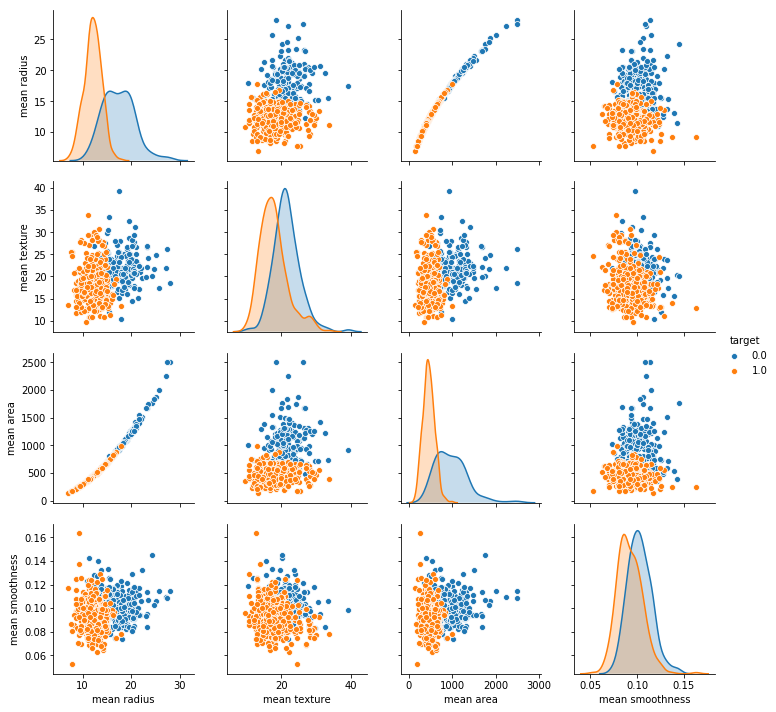

In [3]:
# visualising dataset
sns.pairplot(df_cancer, hue='target', vars=['mean radius', 'mean texture', 'mean area', 'mean smoothness'])

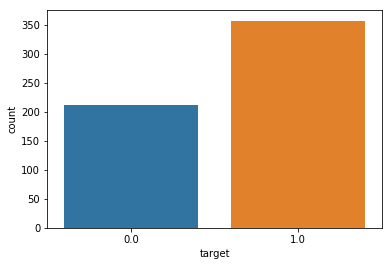

In [4]:
sns.countplot(x=df_cancer['target'])

# there are about 200 malignant and 350 benign

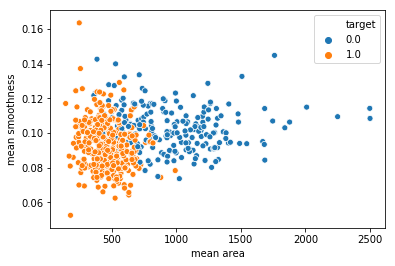

In [6]:
sns.scatterplot(x='mean area', y='mean smoothness', hue='target', data=df_cancer)

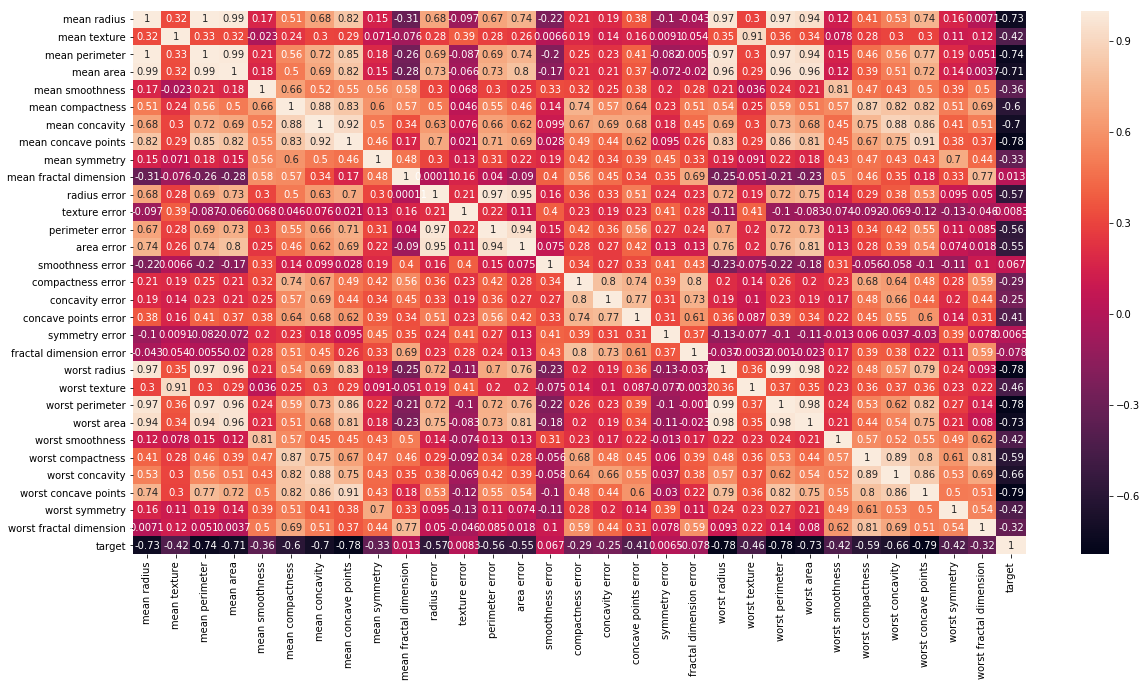

In [13]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_cancer.corr(), annot=True)

In [15]:
# divide the data in input and target output
X = df_cancer.drop('target', axis=1)
y= df_cancer['target']

# splitting train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Train set shape: ', X_train.shape)
print('Test set shape: ', X_test.shape)

Train set shape:  (455, 30)
Test set shape:  (114, 30)


In [25]:
# modeling
import xgboost as xgb
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report # the metric for classification evaluation

Accuracy score: 0.9649122807017544

             precision    recall  f1-score   support

        0.0       0.98      0.93      0.95        43
        1.0       0.96      0.99      0.97        71

avg / total       0.97      0.96      0.96       114

The result confusion matrix


C:\Users\Stock\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


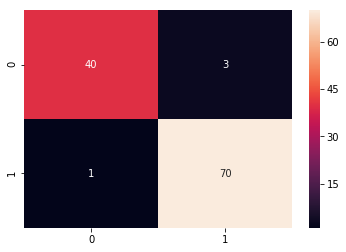

In [27]:
xgb_cls = xgb.XGBClassifier(n_estimators=500, max_depth=4, learning_rate=0.05)

# fit the model
xgb_cls.fit(X_train, y_train)

# make the prediction
y_pred = xgb_cls.predict(X_test)

# model evaluation
print('Accuracy score: {}\n'.format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))
print('The result confusion matrix')
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

# as the result below, the accurray is 0.96, this mean the model have 96% accuracy 

In [29]:
# prediction from svm model
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [33]:
# before fit SVM model we need to normalize the data
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)


# set the range parameter which we want to test
param_grid = {'C':[0.1, 1, 10, 100], 'gamma':[1, 0.1, 0.01, 0.001], 'kernel':['rbf']}

grid = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=10, scoring='accuracy', verbose=4)
# fit the svm classifier with gridsearch
grid.fit(X_train_sc, y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6304347826086957, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6304347826086957, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6304347826086957, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6304347826086957, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6304347826086957, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6304347826086957, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ...................................

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6222222222222222, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6363636363636364, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.9130434782608695, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.9130434782608695, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.9565217391304348, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.9565217391304348, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.9782608695652174, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ............

[CV]  C=10, gamma=1, kernel=rbf, score=0.6304347826086957, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=0.6304347826086957, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=0.6304347826086957, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=0.6521739130434783, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=0.6222222222222222, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=0.6222222222222222, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=0.6222222222222222, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf ................................

[CV] ........ C=100, gamma=0.001, kernel=rbf, score=1.0, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ........ C=100, gamma=0.001, kernel=rbf, score=1.0, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV]  C=100, gamma=0.001, kernel=rbf, score=0.9777777777777777, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV]  C=100, gamma=0.001, kernel=rbf, score=0.9777777777777777, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV]  C=100, gamma=0.001, kernel=rbf, score=0.9555555555555556, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV]  C=100, gamma=0.001, kernel=rbf, score=0.9318181818181818, total=   0.0s


[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    1.9s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=4)

In [36]:
print('show the best parameters: ', grid.best_params_)
print('the best accuracy score: ', grid.best_score_)

show the best parameters:  {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
the best accuracy score:  0.978021978021978


In [38]:
# build the svm model with best parameters
svm_cls = SVC(kernel='rbf', gamma=0.01, C=10)

# fit the classifier
svm_cls.fit(X_train_sc, y_train)
# make the prediction
y_pred_svm = svm_cls.predict(X_test_sc)

# evaluation with accuacy
print('Accuracy score: ', accuracy_score(y_test, y_pred_svm))

Accuracy score:  0.9824561403508771


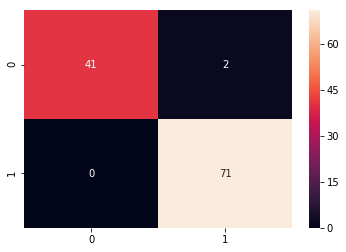

In [39]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True)

In [41]:
print(classification_report(y_test, y_pred_svm))

             precision    recall  f1-score   support

        0.0       1.00      0.95      0.98        43
        1.0       0.97      1.00      0.99        71

avg / total       0.98      0.98      0.98       114



# Feature Selection with XGB importance

In [43]:
# feature selection to improve the model or reduce the dimensions
from sklearn.feature_selection import SelectFromModel

In [45]:
# select the features if the importance is greater than median importance
selected = SelectFromModel(xgb_cls, threshold='median')
selected.fit(X_train, y_train)

SelectFromModel(estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
        norm_order=1, prefit=False, threshold='median')

In [52]:
# get the selected features
selected_feats = X_train.columns[selected.get_support()]
print('# selected features: ', len(selected_feats))
selected_feats

# selected features:  15


Index(['mean texture', 'mean smoothness', 'mean concave points', 'area error',
       'compactness error', 'concave points error', 'symmetry error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst concavity', 'worst concave points',
       'worst symmetry'],
      dtype='object')

accuracy score:  0.9649122807017544


C:\Users\Stock\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


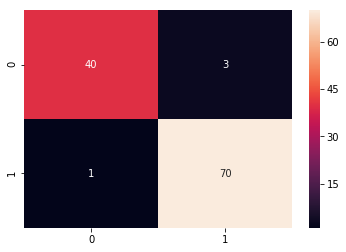

In [51]:
# train the xgb model with selected features
xgb_cls.fit(X_train[selected_feats], y_train)

# predicted by selected feaures
y_pred = xgb_cls.predict(X_test[selected_feats])

# showing the accuracy
print('accuracy score: ', accuracy_score(y_test, y_pred))
# evaluation by confusion_matrix and visualising with heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

# conculsion
# although the accuracy is same as the all in features
# but we reduce the dimension which improve the computing speed